In [16]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
halsbandparkiet = f'../3_scaling/scaled_data/observations_halsbandparkiet_scaled.parquet'
boomklever = f'../3_scaling/scaled_data/observations_boomklever_scaled.parquet'

# Load the data
df_halsbandparkiet = pd.read_parquet(halsbandparkiet, engine="pyarrow")
df_boomklever = pd.read_parquet(boomklever, engine="pyarrow")

# group by year
df_halsbandparkiet_yearly = df_halsbandparkiet.reset_index().groupby(['year']).agg({'observation_count_sc': 'sum', 'observation_id': 'count'}).rename(columns={'observation_count_sc': 'halsbandparkiet_sc', 'observation_id': 'halsbandparkiet_abs'})
df_boomklever_yearly = df_boomklever.reset_index().groupby(['year']).agg({'observation_count_sc': 'sum', 'observation_id': 'count'}).rename(columns={'observation_count_sc': 'boomklever_sc','observation_id': 'boomklever_abs'})

# todo full merge (dit is een inner merge)
# merge the two dataframes
df_yearly = pd.merge(df_halsbandparkiet_yearly, df_boomklever_yearly, on=['year'])
df_yearly.sort_index(ascending=True).head(200)

,halsbandparkiet_sc,halsbandparkiet_abs,boomklever_sc,boomklever_abs
year,,,,
1971,446.030330,1,1338.090990,3
1972,189.358076,1,1704.222685,9
1975,329.127811,3,3620.405924,33
1977,135.244793,1,405.734379,3
1978,88.487744,1,1415.803911,16
1979,328.904092,5,657.808183,10
1980,170.227253,4,1617.158907,38
1981,204.415372,7,1197.290036,41
1982,428.540819,14,1040.741988,34


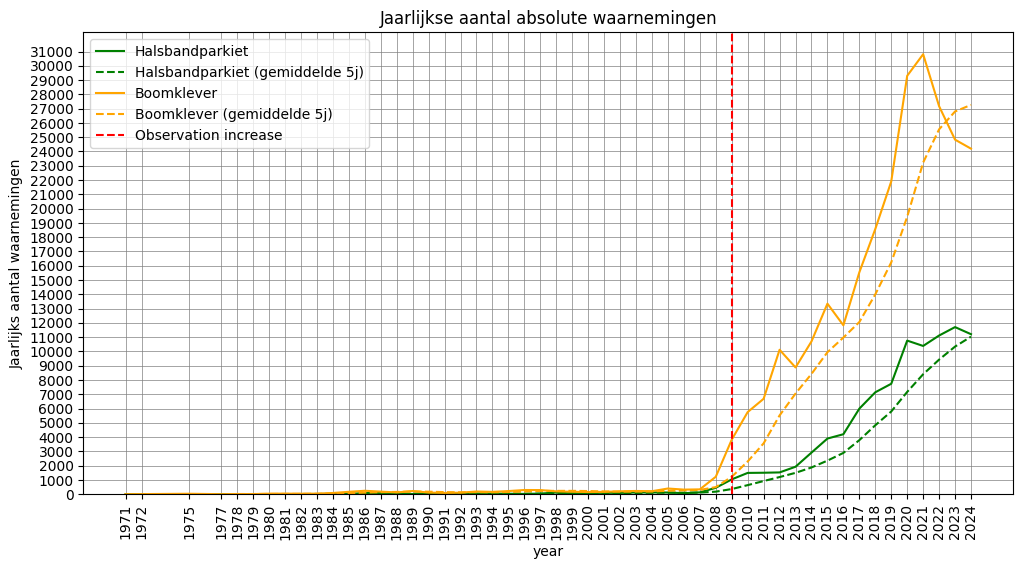

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

# Plot data
ax.plot(df_yearly.index, df_yearly['halsbandparkiet_abs'].values, label='Halsbandparkiet', color='green')
ax.plot(df_yearly.index, df_yearly['halsbandparkiet_abs'].rolling(window=5).mean(), linestyle='--', label='Halsbandparkiet (gemiddelde 5j)', color='green')
ax.plot(df_yearly.index, df_yearly['boomklever_abs'].values, label='Boomklever', color='orange')
ax.plot(df_yearly.index, df_yearly['boomklever_abs'].rolling(window=5).mean(), linestyle='--', label='Boomklever (gemiddelde 5j)', color='orange')

# Labels en titel
ax.set_xlabel('year')  # Add an x-label to the Axes.
ax.set_ylabel('Jaarlijks aantal waarnemingen')  # Add a y-label to the Axes.
ax.set_title("Jaarlijkse aantal absolute waarnemingen")  # Add a title to the Axes.

# X-as instellingen
plt.xticks(df_yearly.index)
plt.xticks(rotation=90)

# Dynamische y-as schaal instellen
y_max = max(df_yearly['halsbandparkiet_abs'].max(), df_yearly['boomklever_abs'].max())
y_ticks = list(range(0, int(y_max) + 1000, 1000))
plt.yticks(y_ticks)
ax.set_ylim(bottom=0)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')

# Verticale lijn en legenda
ax.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax.legend() 

plt.show()

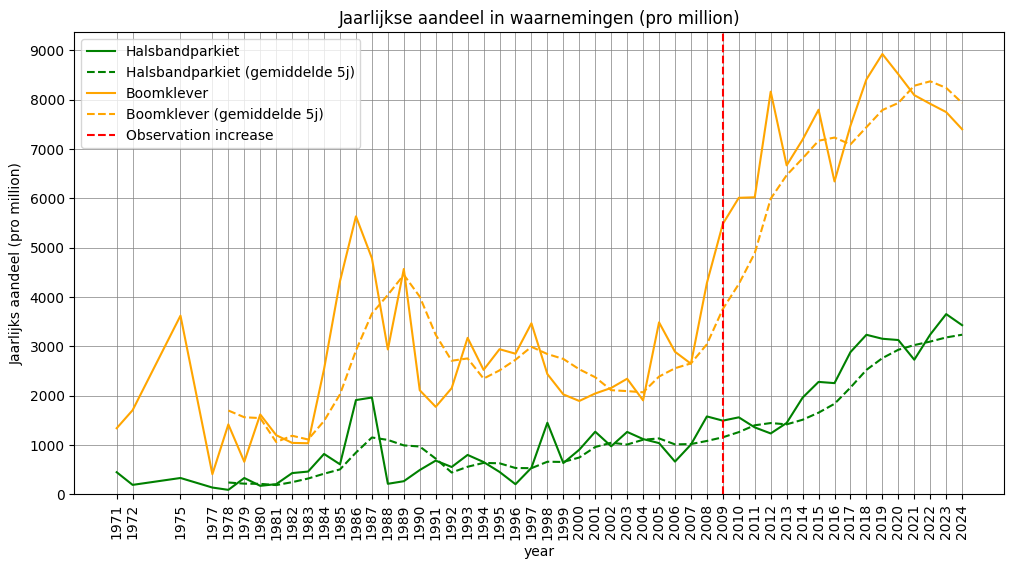

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

# Plot data
ax.plot(df_yearly.index, df_yearly['halsbandparkiet_sc'].values, label='Halsbandparkiet', color='green')
ax.plot(df_yearly.index, df_yearly['halsbandparkiet_sc'].rolling(window=5).mean(), linestyle='--', label='Halsbandparkiet (gemiddelde 5j)', color='green')
ax.plot(df_yearly.index, df_yearly['boomklever_sc'].values, label='Boomklever', color='orange')
ax.plot(df_yearly.index, df_yearly['boomklever_sc'].rolling(window=5).mean(), linestyle='--', label='Boomklever (gemiddelde 5j)', color='orange')

# Labels en titel
ax.set_xlabel('year')  # Add an x-label to the Axes.
ax.set_ylabel('Jaarlijks aandeel (pro million)')  # Add a y-label to the Axes.
ax.set_title("Jaarlijkse aandeel in waarnemingen (pro million)")  # Add a title to the Axes.

# X-as instellingen
plt.xticks(df_yearly.index)
plt.xticks(rotation=90)

# Dynamische y-as schaal instellen
y_max = max(df_yearly['halsbandparkiet_sc'].max(), df_yearly['boomklever_sc'].max())
y_ticks = list(range(0, int(y_max) + 1000, 1000))
plt.yticks(y_ticks)
ax.set_ylim(bottom=0)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')

# Verticale lijn en legenda
ax.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax.legend() 

plt.show()

### Conclusie
In deze grafiek zien we volgende zaken
- In de jaren 70 en 80 zijn er amper waarnemingen. Pas sinds 2009 komt het aantal jaarlijkse waarnemingen boven de 1000. </br>Voor 2009 is het aandeel in waarnemingen niet betrouwbaar.
- Er is over de jaren nog veel fluctuatie in waarnemingen en het aandeel. Zelf na 2009, als de waarnemingen volop de hoogte inschieten door de burgerparticipatie. Dit ligt vermoedelijk eerder aan de betrouwbaarheid van de data dan aan het effectieve voorkomen van de vogels. Mogelijke zaken aan de basis van deze schommelingen.
    - Projecten: De data in de databank komt van burgerwaarnemingen, maar ook uit andere bronnen, bv. projectwerk. Indien er projecten gefocussed waren op welbepaalde soorten, kunnen hun waarnemingen ook toenemen.
    - Media: Aandacht in de media betreffende een vogelsoort, kan ook de aandacht van de waarnemers op deze soort aanwakkeren, waardoor deze meer gespot en gelogd worden.
- De algemene tendens is dat zowel de halsbandparkiet als de boomklever het goed doen. Hun aandeel in de waarnemingen stijgt met de tijd. </br> Verrassend is dat de boomklever een grotere toename kent als de halsbandparkiet. Dit komt overeen wat we vinden in de literatuur.


> De boomklever heeft Vlaanderen helemaal veroverd. In de jaren 1960 kon je het aantal broedkoppels per provincie nog op twee handen tellen. Maar door een natuurvriendelijker bosbeheer met respect voor het nut van stervend en dood hout, konden veel bosvogels hun bestand opkrikken, inbegrepen de spechten die boomklevers van broedholen voorzien. In de jaren 1980 steeg het Vlaamse boomkleverbroedbestand tot een drieduizendtal koppels, tegenwoordig zijn het er misschien wel meer dan zevenduizend. </br> _zie naslagwerk: 2024-03-01_knack_Dirk Draulans' Beestenboel\_ hoe de boomklever profiteert van het succes van de specht.pdf_

Als algemene conclusie kunnen we stellen dat zowel de boomklever als de halsbandparkiet het goed doen in België en nog steeds in opmars zijn. </br>We hebben voor meer dan 50 jaar data beschikbaar, maar de bulk van de observaties bevindt zich in de laatste 10 jaar.